In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils import *



In [2]:
# unpack data
dfolder = 'data/dscovr/' # location of data
df = read_year(dfolder, '2016') # open first year

# loop to collect and merge all datasets across all years
yr = 2017
while yr < 2023:
    df_yr = read_year(dfolder, str(yr))
    df = pd.concat([df, df_yr], ignore_index=True)
    yr +=1

# check    
df.head()
df['time'][0]

Timestamp('2016-01-01 00:00:00')

In [14]:
# dirty method for quick data overview
print(df.describe())

# get correlation matrix
dfcorr_values = df.corr()

# stack matrix
stacked = dfcorr_values.stack()

# find highest correlation pairs
highest = stacked[stacked != 1.0].nlargest(10)
print(highest)

In [13]:
len(df['BZ'])

3101760

[Text(16436.0, 0, '2015-01-01'),
 Text(16801.0, 0, '2016-01-01'),
 Text(17167.0, 0, '2017-01-01'),
 Text(17532.0, 0, '2018-01-01'),
 Text(17897.0, 0, '2019-01-01'),
 Text(18262.0, 0, '2020-01-01'),
 Text(18628.0, 0, '2021-01-01'),
 Text(18993.0, 0, '2022-01-01'),
 Text(19358.0, 0, '2023-01-01')]

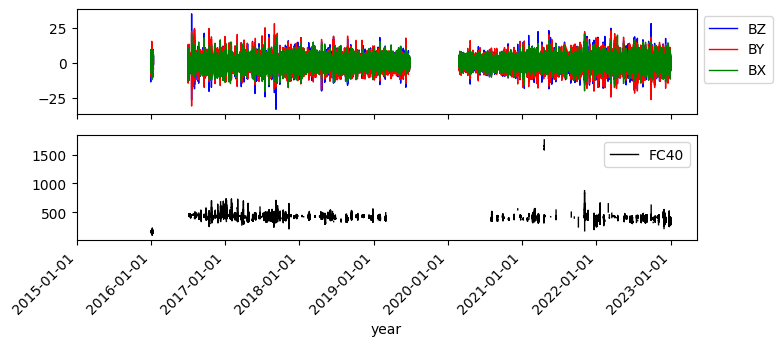

In [5]:
def plot_var_overview(ax, t, var, ylab=False, **kwargs):
    
    var_name = var.name # get variable name

    ax.plot(t,var, linewidth=1, label=var_name, **kwargs)
    if ylab == True:
        ax.set_xlabel(f"year")
    
    # plot legend
    ax.legend(bbox_to_anchor=(1, 1))
    
# example, look at B(x,y,z)
fig, ax = plt.subplots(2, figsize=(8, 3), sharex=True) # (A/N): (8, 1) good size for single plot
plot_var_overview(ax[0],df['time'], df['BZ'], c='b')
plot_var_overview(ax[0],df['time'], df['BY'], c='r')
plot_var_overview(ax[0],df['time'], df['BX'], c='g')
plot_var_overview(ax[1],df['time'], df['FC40'], ylab = True, c='k')

# x-axis tick label rotation to fit length of dates
ax[1].set_xticks(ax[1].get_xticks().tolist())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
